# Import

In [1]:
import numpy as np

import pandas as pd

from scipy.spatial import distance
from scipy.stats import mode

import matplotlib.pyplot as plt

# Implementation

In [2]:
class DBSCAN(object):
    def __init__(self, epsilon=3, min_points=3):
        self.epsilon = epsilon
        self.min_points = min_points
        
        
    def is_cluster_in_cluster(self, idx, cluster, clusters):
        res = []
        for i, c in enumerate(clusters):
            if (i==idx):
                continue
            if (len(np.intersect1d(cluster, c)) > 0):
                res.append(i)

        return res


    def expand_cluster(self, neighbors_per_point, point, visited):
        arr = np.array([])
        for i, p in enumerate(point):
            arr = np.union1d(arr, neighbors_per_point[p])
            visited[point[i]] = 1

        return arr
    
        
    def fit(self, X):
        X_distances = distance.cdist(X, X, 'euclidean')
    
        # init neighbors
        neighbors_per_point = []

        for data in X:
            neighbors_per_point.append([])

        # find neighbor in each point
        for i, distances in enumerate(X_distances):
            neighbors_per_point[i] = np.nonzero(distances <= self.epsilon)[0]

        neighbors_per_point = np.array(neighbors_per_point)

        clusters = []
        visited = np.zeros(X.shape[0])

        # creating clusters
        for i, point in enumerate(neighbors_per_point):
            if visited[i] == 1:
                continue
            if len(point) >= self.min_points:
                visited[i] = 1
                cluster = self.expand_cluster(neighbors_per_point, point, visited)
                idx_another_cluster = self.is_cluster_in_cluster(i, cluster, clusters)
                if (len(idx_another_cluster) > 0):
                    another_cluster = np.array([])
                    for idx in idx_another_cluster:
                        another_cluster = np.concatenate((another_cluster, clusters[idx]), axis=None)
                    for idx in reversed(idx_another_cluster):
                        del clusters[idx]
                    cluster = np.union1d(cluster, another_cluster)
                clusters.append(cluster)
        
        self.clusters = clusters
        return
    
    
    def replace_labels(self, pred_labels):
        dict_replace = {
            -1: 2,
            0: 0,
            1: 1
        }
        pred_labels = np.array([dict_replace[label] for label in pred_labels])

        return pred_labels
        
    
    def fit_predict(self, X):
        self.fit(X)
        label = np.full((len(X)), -1)
        for i, data in enumerate(X):
            if (len(self.clusters) > 0):
                for j, c in enumerate(self.clusters):
                    if (np.any(c == i)):
                        label[i] = j
                        
        self.labels = self.replace_labels(label)
        return self.labels
    
    
    def accuracy_score(self, y):
        print('Accuracy score: {}'.format((len(y) - len(np.where(self.labels != y)[0])) / len(y)))
        return

# Import dataset

In [3]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target

Text(0.5, 1.0, 'Label')

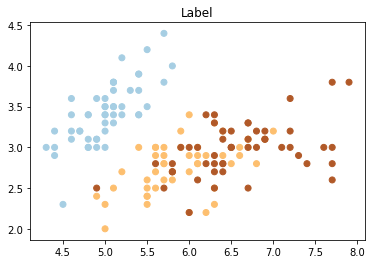

In [4]:
plt.scatter(X[:,0], X[:,1],c=y, cmap='Paired')
plt.title("Label")

# Model Usage

In [6]:
epsilon = 0.5
min_points = 14

In [7]:
model = DBSCAN(epsilon=epsilon, min_points=min_points)

In [8]:
model.fit_predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1])

Accuracy score: 0.8666666666666667


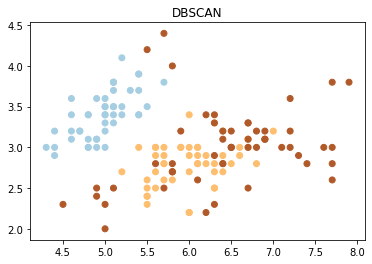

In [9]:
y_pred = model.fit_predict(X)
plt.scatter(X[:,0], X[:,1],c=y_pred, cmap='Paired')
plt.title("DBSCAN")
model.accuracy_score(y)

# Comparison with scikit-learn

In [10]:
# replacing result, adjusting with y
dict_replace = {
    -1: 2,
    0: 0,
    1: 1
}

Accuracy score: 0.8533333333333334


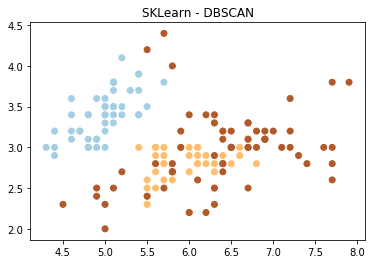

In [13]:
from sklearn.cluster import DBSCAN as sklearn_dbscan

sklearn_model = sklearn_dbscan(eps=epsilon, min_samples=min_points)

y_pred_sklearn = sklearn_model.fit_predict(X)
y_pred_sklearn = [dict_replace[pred] for pred in y_pred_sklearn]
# print(y_pred_sklearn)
plt.scatter(X[:,0], X[:,1],c=y_pred_sklearn, cmap='Paired')
plt.title("SKLearn - DBSCAN")
print('Accuracy score: {}'.format((len(y) - len(np.where(y_pred_sklearn != y)[0])) / len(y)))